## CHEATSHEET

### Libraries

In [7]:
!pip install statsmodels seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 438.0 kB/s  0:00:24m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
# --- IMPORTS ---
import pandas as pd              # Práca s tabuľkami (DataFrame)
import numpy as np               # Matematika a polia
import matplotlib.pyplot as plt  # Základné grafy
import seaborn as sns            # Krajšie štatistické grafy
import scipy.stats as stats      # Štatistické testy (T-testy, ANOVA...)
import statsmodels.api as sm     # Pokročilá štatistika (Regresia)
import statsmodels.formula.api as smf # R-style formuly pre regresiu

# Nastavenie dizajnu grafov
sns.set_theme(style="whitegrid", palette="muted")
%matplotlib inline

print("✅ Libraries successfully loaded!")

✅ Knižnice úspešne načítané!


### Data Loading

In [ ]:
# pd.read_excel("data.xlsx")

In [21]:
try:
    df = pd.read_csv("lifestyle.csv", sep=";")
    print("✅ Data successfully loaded.")
except FileNotFoundError:
    print("ERROR: File not found.")

df.head()

✅ Data successfully loaded.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,BPs,BPd,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea


In [20]:
print(df.info()) # Table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   BPs                      374 non-null    int64  
 10  BPd                      374 non-null    int64  
 11  Heart Rate               374 non-null    int64  
 12  Daily Steps              374 non-null    int64  
 13  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(9), o

### Table formatting

In [27]:
(df.head(10).style
    .background_gradient(
        cmap='Blues',   # Skús aj 'Purples', 'Greys' alebo 'GnBu' (zeleno-modrá)
        low=0.1,        # 0.5 = Oreže 50% najsvetlejších farieb (aby to nebolo úplne biele)
        high=0.7        # 0.5 = Oreže 50% najtmavších farieb (aby text ostal čitateľný)
    )
    .format(precision=2)
    .highlight_null(color='#f8d7da') # Jemná pastelová ružová pre chýbajúce dáta
    .set_caption("Ukážka dát: Lifestyle Dataset") # Pridá nadpis tabuľky
)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,BPs,BPd,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.10,6,42,6,Overweight,126,83,77,4200,nan
1,2,Male,28,Doctor,6.20,6,60,8,Normal,125,80,75,10000,nan
2,3,Male,28,Doctor,6.20,6,60,8,Normal,125,80,75,10000,nan
3,4,Male,28,Sales Representative,5.90,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.90,4,30,8,Obese,140,90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.90,4,30,8,Obese,140,90,85,3000,Insomnia
6,7,Male,29,Teacher,6.30,6,40,7,Obese,140,90,82,3500,Insomnia
7,8,Male,29,Doctor,7.80,7,75,6,Normal,120,80,70,8000,nan
8,9,Male,29,Doctor,7.80,7,75,6,Normal,120,80,70,8000,nan
9,10,Male,29,Doctor,7.80,7,75,6,Normal,120,80,70,8000,nan


## Descriptive Stats

#### Basic numerical statistics:

In [28]:
display(df.describe().round(2))

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BPs,BPd,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,128.55,84.65,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,7.75,6.16,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,115.00,75.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,125.00,80.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,130.00,85.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,135.00,90.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,142.00,95.00,86.00,10000.00


#### Group by column:

In [30]:
grp_stats = df.groupby('Age')['Physical Activity Level'].agg(['mean', 'median', 'std', 'count'])
display(grp_stats.round(2))

,mean,median,std,count
Age,,,,
27,42.00,42.0,NaN,1
28,42.00,30.0,16.43,5
29,46.15,40.0,20.43,13
30,68.85,75.0,15.02,13
31,67.50,75.0,17.26,18
32,40.88,30.0,17.52,17
33,33.08,30.0,7.51,13
34,32.00,32.0,0.00,2
35,56.67,60.0,7.78,12


#### Specific column stat:

In [34]:
act_lvl = df["Physical Activity Level"]
print(f"\nPriemer PAL: {act_lvl.mean():.2f}")
print(f"Medián PAL:  {act_lvl.median():.2f}")
print(f"Max PAL:  {act_lvl.max():.2f}")
print(f"Min PAL:  {act_lvl.min():.2f}")
print(f"Rozptyl (s^2): {act_lvl.var(ddof=1):.2f}") # ddof=1 pre výberový rozptyl!
print(f"Smerodajná odchýlka (s): {act_lvl.std(ddof=1):.2f}")
print(f"Šikmosť (Skewness): {act_lvl.skew():.2f}") # 0 = symetrické
print(f"Špicatosť (Kurtosis): {act_lvl.kurt():.2f}")


Priemer PAL: 59.17
Medián PAL:  60.00
Max PAL:  90.00
Min PAL:  30.00
Rozptyl (s^2): 433.92
Smerodajná odchýlka (s): 20.83
Šikmosť (Skewness): 0.07
Špicatosť (Kurtosis): -1.27


### 🏆 Prečo práve Box Plot?
* **Detektiv** porovnať rozdelenie číselnej hodnoty medzi rôznymi skupinami.
  ---
* **Číselná premenná (Os Y)**: Niečo, čo sa dá merať (Dĺžka spánku, Kvalita spánku, Tep, Kroky).
* **Kategorická premenná (Os X)**: Skupiny, ktoré chceš porovnať (Povolanie, Pohlavie, BMI, Spánková porucha).
---
* Ktore povolanie spi najmenej?

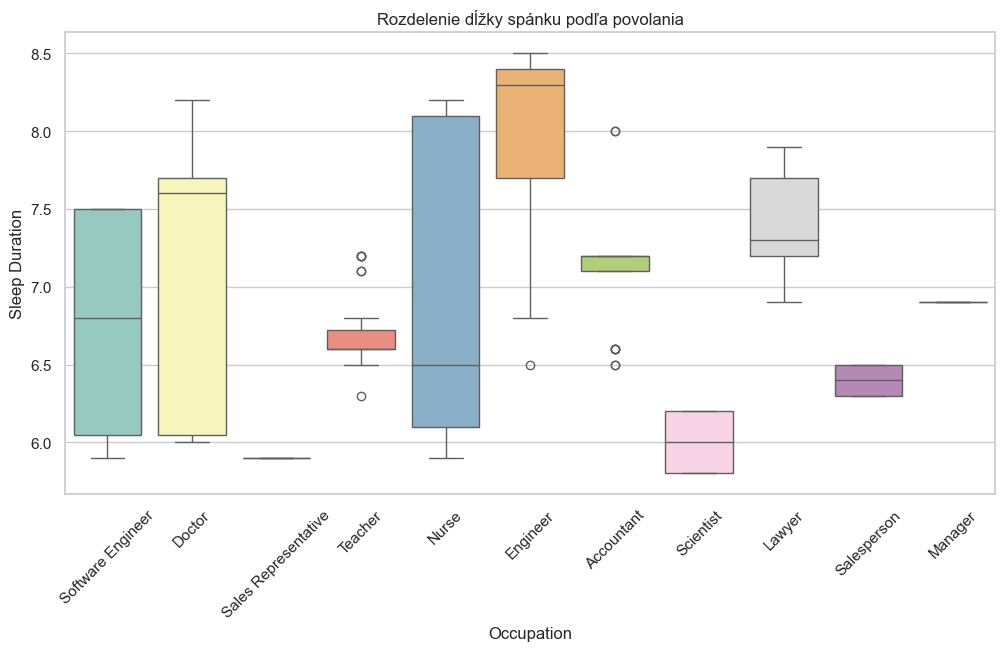

In [43]:
plt.figure(figsize=(12, 6))

# x = Kategória (napr. 'Occupation', 'Gender', 'BMI Category', 'Sleep Disorder')
# y = Číslo (napr. 'Sleep Duration', 'Quality of Sleep', 'Heart Rate', 'Daily Steps')

sns.boxplot(data=df, x='Occupation', y='Sleep Duration', 
            hue='Occupation', legend=False, palette="Set3")

plt.xticks(rotation=45)
plt.title('Rozdelenie dĺžky spánku podľa povolania')
plt.show()

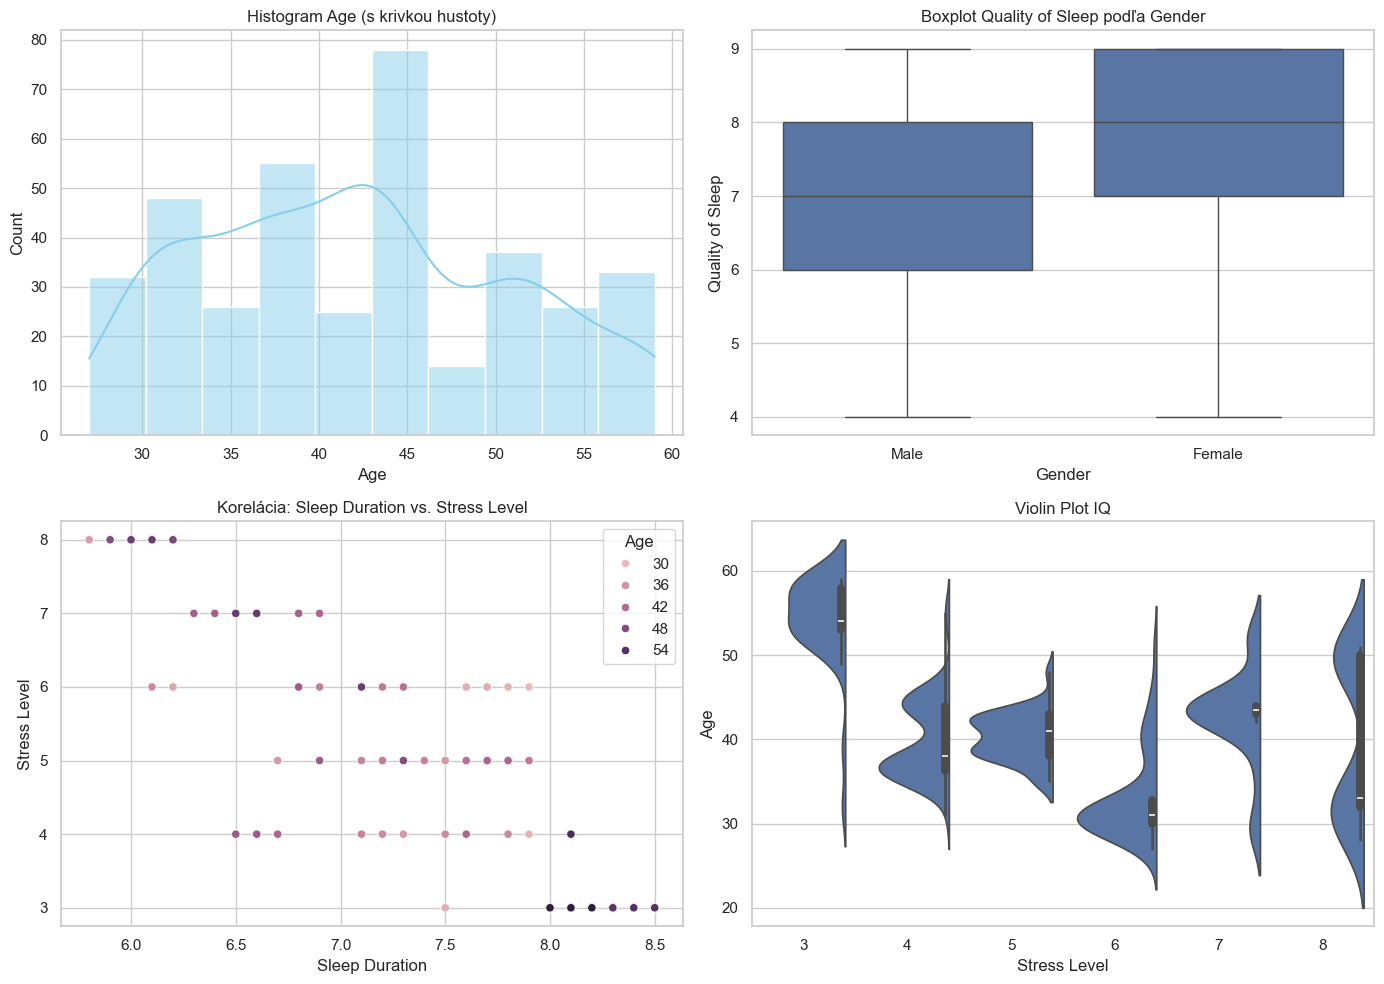

In [44]:
# Nastavenie plochy pre 2x2 grafy
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. HISTOGRAM (Rozdelenie dát)
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram Age (s krivkou hustoty)')

# 2. BOXPLOT (Porovnanie skupín a Outliery)
sns.boxplot(data=df, x='Gender', y='Quality of Sleep', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot Quality of Sleep podľa Gender')

# 3. SCATTERPLOT (Vzťah dvoch premenných)
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='Age', ax=axes[1, 0])
axes[1, 0].set_title('Korelácia: Sleep Duration vs. Stress Level')

# 4. VIOLIN PLOT (Kombinácia boxplotu a histogramu)
sns.violinplot(data=df, x='Stress Level', y='Age', ax=axes[1, 1], split=True)
axes[1, 1].set_title('Violin Plot IQ')

plt.tight_layout()
plt.show()

### Graphs and theory - 2 numerical data

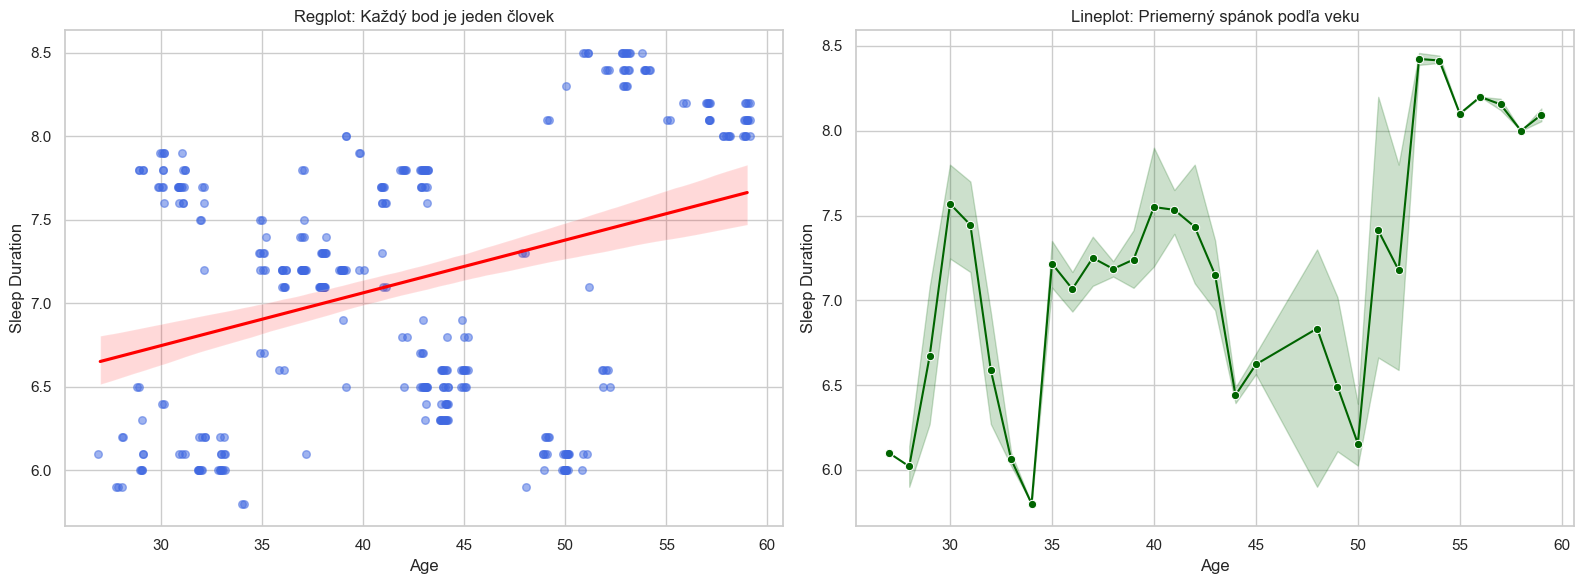

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nastavenie štýlu
sns.set_theme(style="whitegrid")

# Vytvorenie plochy pre 2 grafy vedľa seba
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. SCATTER PLOT s Regresnou priamkou (Regplot) ---
# x_jitter=0.2 znamená, že body trochu "roztrasieme" do šírky, aby sa neprekrývali
sns.regplot(data=df, x='Age', y='Sleep Duration', ax=axes[0], 
            color='royalblue', x_jitter=0.2, 
            scatter_kws={'alpha': 0.5, 's': 30}, # Priehľadnosť a veľkosť bodov
            line_kws={'color': 'red'})           # Červená čiara trendu

axes[0].set_title('Regplot: Každý bod je jeden človek')

# --- 2. LINE PLOT (Čiarový graf priemerov) ---
# Tento graf automaticky vypočíta priemer pre každý vek a nakreslí tieň (interval spoľahlivosti)
sns.lineplot(data=df, x='Age', y='Sleep Duration', ax=axes[1], 
             color='darkgreen', marker='o')

axes[1].set_title('Lineplot: Priemerný spánok podľa veku')

plt.tight_layout()
plt.show()

# 📊 Analýza vzťahu: Vek a Dĺžka spánku

Pre analýzu dvoch **číselných premenných** (*Age* = číselná, *Sleep Duration* = číselná) je v dátovej analýze "kráľom" **Bodový graf (Scatter Plot)**.

### 🏆 Prečo práve Scatter Plot?
* **Každý bod je človek:** Vidíš presne, ako sú dáta v priestore rozložené.
* **Hľadanie trendu:** Okamžite vidíš, či s vekom spánok klesá alebo stúpa (lineárna regresia).
* **Hľadanie zhlukov:** Odhalíš, či existujú špecifické skupiny ľudí, ktorí spia podobne.

---

### 🛠️ Vysvetlenie použitých grafov

#### 1. Vľavo: Regplot (Scatter s regresiou)
* **Bodky:** Každá bodka reprezentuje jeden riadok z tabuľky.
* **Červená čiara:** Regresná priamka, ktorá ukazuje **hlavný trend** (ak smeruje hore ↗, starší ľudia spia dlhšie).

> **💡 Tip:** Použil som parameter `x_jitter=0.2`. Keďže veľa ľudí má presne 30 rokov, bodky by sa prekryli a zlievali. Jitter ich trochu "roztrasie" do šírky, aby sme videli skutočnú hustotu dát.

#### 2. Vpravo: Lineplot (Vývoj priemeru)
* **Čiara:** Spája **priemernú** dĺžku spánku pre každý vek.
* **Tieň:** Predstavuje **95 % interval spoľahlivosti** (Confidence Interval).
    * *Úzky tieň* = Máme veľa dát, sme si istí priemerom.
    * *Široký tieň* = Málo dát, priemer je len hrubý odhad.

---

### 📉 Čo nám hovoria dáta?
1.  **Rastúci trend:** S pribúdajúcim vekom (od 30 do 60 rokov) sa priemerná dĺžka spánku v tejto vzorke **zvyšuje**.
2.  **Kritický vek:** Okolo **40-tky** vidíme malý "prepad" (možná súvislosť so stresom v práci alebo rodine?).
3.  **Zlatý vek:** Po **50-tke** spánok výrazne stúpa smerom k 8 hodinám.

## Inductive Stats - Hypothesis testing

Shapiro-Wilk Test - Test of Normal distribution

In [49]:
stat, p_val = stats.shapiro(df['Sleep Duration'])
print(f"Shapiro-Wilk test: p-hodnota = {p_val:.4f}")
if p_val > 0.05:
    print("✅ Dáta majú normálne rozdelenie (nezamietame H0).")
else:
    print("❌ Dáta NEMAJÚ normálne rozdelenie (zamietame H0).")

Shapiro-Wilk test: p-hodnota = 0.0000
❌ Dáta NEMAJÚ normálne rozdelenie (zamietame H0).


### T-testy - Muzi vs Zeny

In [51]:
print("\n=== 2. POROVNANIE SKUPÍN (Muži vs Ženy) ===")
muzi = df[df['Gender'] == 'Male']['Sleep Duration']
zeny = df[df['Gender'] == 'Female']['Sleep Duration']

# Parametrický test (T-test)
t_stat, p_ttest = stats.ttest_ind(muzi, zeny)

# Neparametrický test (Mann-Whitney) - BEZPEČNEJŠÍ
u_stat, p_mann = stats.mannwhitneyu(muzi, zeny)

print(f"Priemer Muži: {muzi.mean():.2f} h, Ženy: {zeny.mean():.2f} h")
print(f"T-test p-hodnota:      {p_ttest:.4f}")
print(f"Mann-Whitney p-hodnota:{p_mann:.4f}")


=== 2. POROVNANIE SKUPÍN (Muži vs Ženy) ===
Priemer Muži: 7.04 h, Ženy: 7.23 h
T-test p-hodnota:      0.0187
Mann-Whitney p-hodnota:0.0144


* Otázka: **Spia ženy dlhšie ako muži?**
* Záver: Obidva testy vyšli **pod 0.05. Áno**, existuje štatisticky významný rozdiel. Ženy v tejto vzorke spia o niečo dlhšie.

### ANOVA - Viac skupin

In [54]:
print("\n=== 3. VIAC SKUPÍN (ANOVA / Kruskal-Wallis pre BMI) ===")
# Pripravíme si skupiny podľa BMI
groups = [data for name, data in df.groupby('BMI Category')['Sleep Duration']]

# ANOVA (ak by boli normálne)
f_stat, p_anova = stats.f_oneway(*groups)

# Kruskal-Wallis (ak nie sú normálne)
k_stat, p_kruskal = stats.kruskal(*groups)

print(f"ANOVA p-hodnota:         {p_anova:.4e}")
print(f"Kruskal-Wallis p-hodnota:{p_kruskal:.4e}")


=== 3. VIAC SKUPÍN (ANOVA / Kruskal-Wallis pre BMI) ===
ANOVA p-hodnota:         2.1273e-12
Kruskal-Wallis p-hodnota:2.3551e-09


* Otázka: **Má váha vplyv na dĺžku spánku?** Výsledok: $p$-hodnota je extrémne nízka ($10^{-9}$).
* Záver: **Rozhodne áno**. Medzi ľuďmi s normálnou váhou, nadváhou a obezitou sú obrovské rozdiely v spánku. (Pravdepodobne obézni ľudia spia horšie, čo by sme videli na Boxplote).

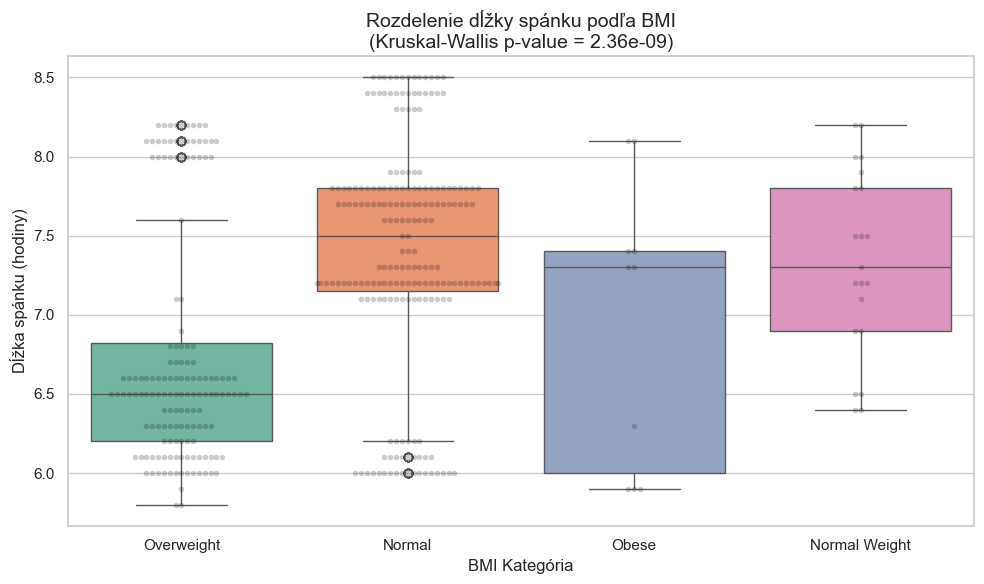

In [58]:
# 2. Výpočet p-hodnoty (aby sme ju dali do nadpisu)
# Rozdelíme dáta do skupín podľa BMI
groups = [data['Sleep Duration'] for name, data in df.groupby('BMI Category')]
k_stat, p_kruskal = stats.kruskal(*groups)

# 3. Vykreslenie grafu
plt.figure(figsize=(10, 6))

# A. Boxplot - ukáže hlavné štatistiky (medián, kvartily)
# hue='BMI Category' používame pre krajšie farby a aby sme sa vyhli warningom
ax = sns.boxplot(data=df, x='BMI Category', y='Sleep Duration', 
                 palette="Set2", hue='BMI Category', dodge=False)

# Odstránime legendu, lebo je zbytočná (kategórie sú už na osi X)
if ax.legend_:
    ax.legend_.remove()

# B. Swarmplot - ukáže jednotlivé body (reálnych ľudí)
# alpha=0.5 spraví body polopriehľadné, aby sme videli, kde sa prekrývajú
sns.swarmplot(data=df, x='BMI Category', y='Sleep Duration', 
              color='black', alpha=0.2, size=4)

# 4. Úprava vzhľadu
plt.title(f'Rozdelenie dĺžky spánku podľa BMI\n(Kruskal-Wallis p-value = {p_kruskal:.2e})', fontsize=14)
plt.ylabel('Dĺžka spánku (hodiny)')
plt.xlabel('BMI Kategória')

plt.tight_layout()
plt.show()

### REGRESIA - Co ovplyvnuje spanok

In [55]:
print("\n=== 4. REGRESIA (Čo ovplyvňuje spánok?) ===")
# Model: Spánok ~ Stres + Vek
model = smf.ols('Q("Sleep Duration") ~ Q("Stress Level") + Age', data=df).fit()
print(model.summary())


=== 4. REGRESIA (Čo ovplyvňuje spánok?) ===
                             OLS Regression Results                            
Dep. Variable:     Q("Sleep Duration")   R-squared:                       0.658
Model:                             OLS   Adj. R-squared:                  0.656
Method:                  Least Squares   F-statistic:                     356.5
Date:                 Tue, 10 Feb 2026   Prob (F-statistic):           4.14e-87
Time:                         11:21:29   Log-Likelihood:                -244.18
No. Observations:                  374   AIC:                             494.4
Df Residuals:                      371   BIC:                             506.1
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Skúšali sme vysvetliť **dĺžku spánku pomocou Veku a Stresu.** 
* **R-squared = 0.65**: Náš model vysvetľuje **65 % variability v spánku**. To je veľmi slušné!
* **Stres** (Stress Level): Koeficient je **-0.36**. Preklad: **Každý bod stresu navyše ti skráti spánok o 0.36 hodiny (cca 22 minút).** Toto je silný vzťah ($p \approx 0$).
* **Vek** (Age): Koeficient je **0.0002** a $p = 0.93$.Preklad: Keď sme do modelu pridali stres, vek prestal byť dôležitý. To naznačuje, že **vek sám o sebe spánok nemení**, ale skôr to, že starší ľudia majú iný stres.

/var/folders/zs/w9px4gys74l5nsf56wl321p40000gn/T/ipykernel_3274/1971200681.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Stress Level', palette='Reds')


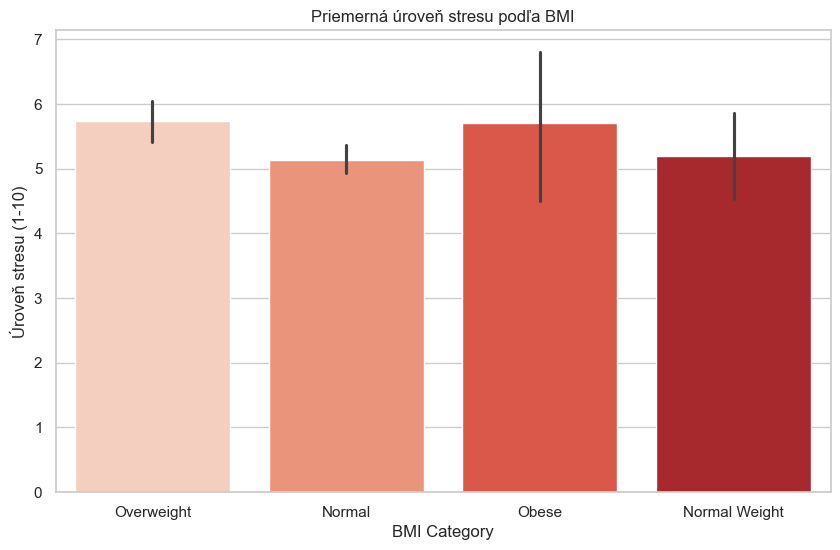

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Pozrieme sa na Stres podľa BMI
sns.barplot(data=df, x='BMI Category', y='Stress Level', palette='Reds')

plt.title('Priemerná úroveň stresu podľa BMI')
plt.ylabel('Úroveň stresu (1-10)')
plt.show()

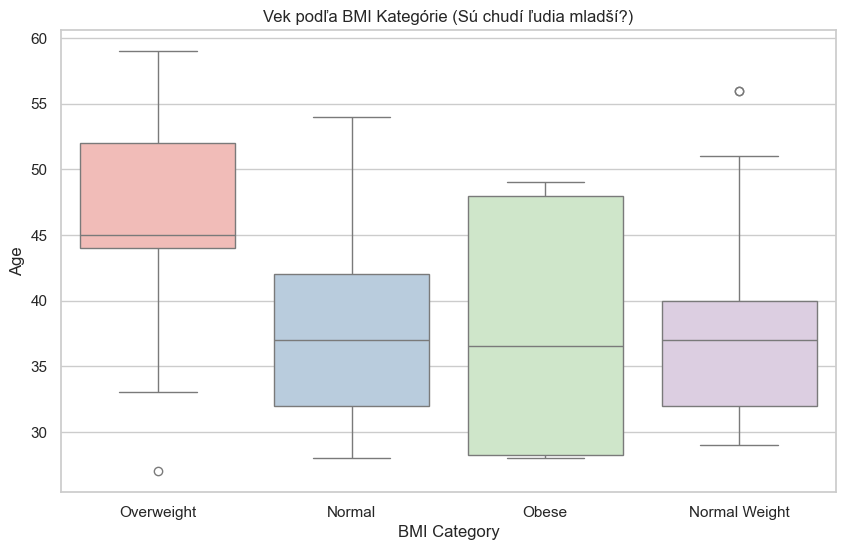

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Pozrieme sa, či sú chudí ľudia naozaj mladší
sns.boxplot(data=df, x='BMI Category', y='Age', palette='Pastel1', hue='BMI Category')

plt.title('Vek podľa BMI Kategórie (Sú chudí ľudia mladší?)')
plt.show()